In [2]:
# %load ./dsfs/lr.py
from typing import Tuple

from dsfs.vector import Vector
from dsfs.stats import correlation, standard_deviation, mean, de_mean


def predict(alpha: float, beta: float, x: float) -> float:
    return beta * x + alpha


def error(alpha: float, beta: float, x: float, y: float) -> float:
    return predict(alpha, beta, x) - y


def sum_of_sqerror(alpha: float, beta:float, xs: Vector, ys: Vector) -> float:
    return sum(error(alpha, beta, x_i, y_i)**2 for x_i, y_i in zip(xs, ys))


def least_squares_fit(xs: Vector, ys: Vector) -> Tuple[float, float]:
    beta = correlation(xs, ys) * standard_deviation(ys) / standard_deviation(xs)
    alpha = mean(ys) - beta * mean(xs)
    return alpha, beta


def total_sum_of_squares(xs: Vector) -> float:
    return sum(x ** 2 for x in de_mean(xs))

def r_squared(alpla: float, beta: float, xs: Vector, ys: Vector) -> float:
    return 1 - (sum_of_sqerror(alpha, beta, xs, ys) / total_sum_of_squares(ys))


In [3]:
xs = list(range(-100, 110, 10))
ys = [3 * i - 5 for i in xs]
assert least_squares_fit(xs, ys) == (-5, 3), least_squares_fit(xs, ys)

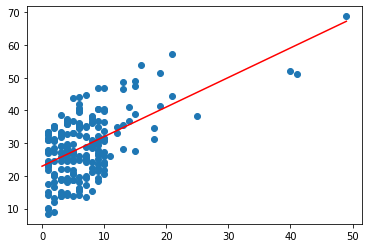

In [4]:
import matplotlib.pyplot as plt

num_friends = [
    100.0,49,41,40,25,21,21,19,19,18,18,16,15,15,15,15,14,14,13,13,13,13,12,12,11,10,10,10,10,10,10,
    10,10,10,10,10,10,10,10,10,9,9,9,9,9,9,9,9,9,9,9,9,9,9,9,9,9,9,8,8,8,8,8,8,8,8,8,8,8,8,8,7,7,7,7,
    7,7,7,7,7,7,7,7,7,7,7,6,6,6,6,6,6,6,6,6,6,6,6,6,6,6,6,6,6,6,6,6,6,5,5,5,5,5,5,5,5,5,5,5,5,5,5,5,5,
    5,4,4,4,4,4,4,4,4,4,4,4,4,4,4,4,4,4,4,4,4,3,3,3,3,3,3,3,3,3,3,3,3,3,3,3,3,3,3,3,3,2,2,2,2,2,2,2,2,
    2,2,2,2,2,2,2,2,2,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1]
daily_minutes = [
    1,68.77,51.25,52.08,38.36,44.54,57.13,51.4,41.42,31.22,34.76,54.01,38.79,47.59,49.1,27.66,41.03,36.73,
    48.65,28.12,46.62,35.57,32.98,35,26.07,23.77,39.73,40.57,31.65,31.21,36.32,20.45,21.93,26.02,27.34,23.49,
    46.94,30.5,33.8,24.23,21.4,27.94,32.24,40.57,25.07,19.42,22.39,18.42,46.96,23.72,26.41,26.97,36.76,40.32,
    35.02,29.47,30.2,31,38.11,38.18,36.31,21.03,30.86,36.07,28.66,29.08,37.28,15.28,24.17,22.31,30.17,25.53,
    19.85,35.37,44.6,17.23,13.47,26.33,35.02,32.09,24.81,19.33,28.77,24.26,31.98,25.73,24.86,16.28,34.51,15.23,
    39.72,40.8,26.06,35.76,34.76,16.13,44.04,18.03,19.65,32.62,35.59,39.43,14.18,35.24,40.13,41.82,35.45,36.07,
    43.67,24.61,20.9,21.9,18.79,27.61,27.21,26.61,29.77,20.59,27.53,13.82,33.2,25,33.1,36.65,18.63,14.87,22.2,36.81,
    25.53,24.62,26.25,18.21,28.08,19.42,29.79,32.8,35.99,28.32,27.79,35.88,29.06,36.28,14.1,36.63,37.49,26.9,18.58,
    38.48,24.48,18.95,33.55,14.24,29.04,32.51,25.63,22.22,19,32.73,15.16,13.9,27.2,32.01,29.27,33,13.74,20.42,27.32,
    18.23,35.35,28.48,9.08,24.62,20.12,35.26,19.92,31.02,16.49,12.16,30.7,31.22,34.65,13.13,27.51,33.2,31.57,14.1,
    33.42,17.44,10.12,24.42,9.82,23.39,30.93,15.03,21.67,31.09,33.29,22.61,26.89,23.48,8.38,27.81,32.35,23.84
]
outlier = num_friends.index(100)
num_friends_good = [x for i, x in enumerate(num_friends) if i != outlier]
daily_minutes_good = [y for i, y in enumerate(daily_minutes) if i != outlier]

alpha, beta = least_squares_fit(num_friends_good, daily_minutes_good)

plt.scatter(num_friends_good, daily_minutes_good)
xs = range(0,50)
ys = [predict(alpha=alpha, beta=beta, x=x) for x in xs]
plt.plot(xs, ys, 'r-')
plt.show()

In [5]:
rsq = r_squared(alpla=alpha, beta=beta, xs=num_friends_good, ys=daily_minutes_good)
display(rsq)

0.3291078377836305

In [6]:
alpha, beta

(22.94755241346903, 0.903865945605865)

In [23]:
import random
theta =[random.uniform(-1, 1), random.uniform(-1, 1)]
from dsfs.gradients import linear_gradient_descent
for epoch, theta in linear_gradient_descent(
    xs=num_friends_good,
    ys=daily_minutes_good,
    num_epochs=2000,
    learning_rate=0.01,
    initial_weights=theta):
    if epoch % 100 == 0:
        print(epoch, theta)

print(theta)

0 [4.240225754138459, 1.0370620488511182]
100 [1.6193981717641934, 14.012220596464966]
200 [1.1940009933886628, 19.32444107213817]
300 [1.021510326773559, 21.478447957079435]
400 [0.9515685603919687, 22.351857801723792]
500 [0.9232084712313601, 22.706009295878605]
600 [0.9117089810296182, 22.849611158831216]
700 [0.9070461510169531, 22.907839051085833]
800 [0.9051554599214713, 22.93144938152796]
900 [0.9043888197461208, 22.94102293265616]
1000 [0.9040779613727656, 22.944904830092057]
1100 [0.9039519140674025, 22.946478867510475]
1200 [0.9039008042226924, 22.947117110492282]
1300 [0.9038800801285225, 22.94737590618484]
1400 [0.9038716768926749, 22.94748084303868]
1500 [0.9038682695363804, 22.94752339298681]
1600 [0.9038668879165944, 22.947540646201663]
1700 [0.903866327695395, 22.947547642060307]
1800 [0.9038661005360893, 22.94755047875123]
1900 [0.903866008427202, 22.94755162897681]
[0.903865971309736, 22.94755209248756]
